# Dataset testing

## 1. Pre-processing

We start by visualising the train/test split inherent to the json dataset:

In [1]:
import json
from collections import Counter
from Dataset import LargeRocksDataset
from utils import *
import os

label_file = "large_rock_dataset.json"

with open(label_file, 'r') as f:
    data = json.load(f)

splits = [tile.get('split', 'train') for tile in data['dataset']]  # Default to 'train' if missing
split_counts = Counter(splits)

for split, count in split_counts.items():
    print(f"{split.capitalize()}: {count} images")
    print(f"Percentage: {count / len(splits) * 100:.2f}%")

Train: 640 images
Percentage: 64.52%
Test: 352 images
Percentage: 35.48%


64 % is a bit low. We therefore will use 10% of images from the test split for validation.

### 2. Converting to YOLO format - using Dataset.py
The following cell provides the yolo format the desired data. *RGBHS* represents combined RGB and HillShade data, *RGB* only RGB. The **combined_rgb_hillshade_patches** folder comes from running the `combine_rgb_hillshade` file. (Uncomment it if necessary in the following cell). 
The split is [80,10,10] by default -  corresponding to train,val,test. This can also be played with.

In [2]:
Create_Datasets = True

In [3]:
## ONLY RUN TO COMBINE RGB AND HILLSHADE IMAGES (DO NOT UNCOMMENT IF ALREADY COMBINED)

if Create_Datasets == True:

    rgb_folder = "swissImage_50cm_patches"
    hillshade_folder = "swissSURFACE3D_hillshade_patches"
    output_folder = "combined_rgb_hillshade_patches"
    combine_rgb_hillshade(rgb_folder, hillshade_folder, output_folder)


100%|██████████| 992/992 [00:04<00:00, 202.07it/s]


In [4]:
#if not os.path.exists("YOLO"):
if Create_Datasets == True:
    ## RGB combined w/ Hillshade
    image_folder = "combined_rgb_hillshade_patches"  # Path to swissImage_50cm_patches or equivalent
    label_file = "large_rock_dataset.json"  # JSON file with annotations
    output_path = "YOLO_RGBHS"  # Directory to save processed dataset

    rgbhs_rocks_dataset = LargeRocksDataset(image_folder, label_file, output_path, split= [80,10,10], combined_rgb_hillshade=True)
    rgbhs_rocks_dataset.process_dataset() 
    rgbhs_rocks_dataset.remove_duplicates_in_labels()
    rgbhs_rocks_dataset.print_actual_split()

else:
    print("YOLO dataset already exists. Skipping dataset creation.")

/Users/janclevorn/miniconda3/envs/IPEO/lib/python3.11/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/Users/janclevorn/miniconda3/envs/IPEO/lib/python3.11/site-packages/rasterio/__init__.py:366: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


Dataset (combined_rgb_hillshade_patches) converted to YOLO format with train/val/test splits at YOLO_RGBHS
----------------------------------------
YOLO_RGBHS/labels/val
Duplicates removed in file: YOLO_RGBHS/labels/val/2626_1102_3_0.txt
YOLO_RGBHS/labels/train
Duplicates removed in file: YOLO_RGBHS/labels/train/2588_1133_0_2.txt
Duplicates removed in file: YOLO_RGBHS/labels/train/2704_1127_3_3.txt
Duplicates removed in file: YOLO_RGBHS/labels/train/2588_1133_1_2.txt
Duplicates removed in file: YOLO_RGBHS/labels/train/2582_1127_0_1.txt
Duplicates removed in file: YOLO_RGBHS/labels/train/2598_1132_1_3.txt
Duplicates removed in file: YOLO_RGBHS/labels/train/2598_1132_0_3.txt
YOLO_RGBHS/labels/test
Duplicates removed in file: YOLO_RGBHS/labels/test/2626_1102_2_0.txt
----------------------------------------
*** RGB Dataset Split ***
Train set: 878 images - 70.98%
Validation set: 166 images - 13.42%
Test set: 193 images - 15.60%
----------------------------------------


In [5]:
#if not os.path.exists("YOLO"):
if Create_Datasets == True:

    ## RGB only
    image_folder = "swissImage_50cm_patches"  # Path to swissImage_50cm_patches or equivalent
    output_path = "YOLO"  # RGB Directory 

    rgb_rocks_dataset = LargeRocksDataset(image_folder, label_file, output_path,split=[75,15,10],)

    rgb_rocks_dataset.process_dataset()
    rgb_rocks_dataset.remove_duplicates_in_labels()
    rgb_rocks_dataset.print_actual_split()

else:
    print("YOLO dataset already exists. Skipping dataset creation.")

Dataset (swissImage_50cm_patches) converted to YOLO format with train/val/test splits at YOLO
----------------------------------------
YOLO/labels/val
Duplicates removed in file: YOLO/labels/val/2626_1102_3_0.txt
YOLO/labels/train
Duplicates removed in file: YOLO/labels/train/2588_1133_0_2.txt
Duplicates removed in file: YOLO/labels/train/2704_1127_3_3.txt
Duplicates removed in file: YOLO/labels/train/2588_1133_1_2.txt
Duplicates removed in file: YOLO/labels/train/2582_1127_0_1.txt
Duplicates removed in file: YOLO/labels/train/2598_1132_1_3.txt
Duplicates removed in file: YOLO/labels/train/2598_1132_0_3.txt
YOLO/labels/test
Duplicates removed in file: YOLO/labels/test/2626_1102_2_0.txt
----------------------------------------
*** RGB Dataset Split ***
Train set: 818 images - 66.23%
Validation set: 171 images - 13.85%
Test set: 246 images - 19.92%
----------------------------------------


In [6]:
# Count the number of images in each split
"""
train_count = len(os.listdir("YOLO/images/train"))
val_count = len(os.listdir("YOLO/images/train"))
test_count = len(os.listdir("YOLO/images/train"))

print("*** RGB Dataset Split ***")
print(f"Train set: {train_count} images - {train_count / len(splits) * 100:.2f}%")
print(f"Validation set: {val_count} images - {val_count / len(splits) * 100:.2f}%")
print(f"Test set: {test_count} images - {test_count / len(splits) * 100:.2f}%")

print("")
print("*** RGB+HS Dataset Split ***")
train_count = len(os.listdir("YOLO_RGBHS/images/train"))
val_count = len(os.listdir("YOLO_RGBHS/images/val"))
test_count = len(os.listdir("YOLO_RGBHS/images/test"))

print(f"Train set: {train_count} images - {train_count / len(splits) * 100:.2f}%")
print(f"Validation set: {val_count} images - {val_count / len(splits) * 100:.2f}%")
print(f"Test set: {test_count} images - {test_count / len(splits) * 100:.2f}%")
"""

'\ntrain_count = len(os.listdir("YOLO/images/train"))\nval_count = len(os.listdir("YOLO/images/train"))\ntest_count = len(os.listdir("YOLO/images/train"))\n\nprint("*** RGB Dataset Split ***")\nprint(f"Train set: {train_count} images - {train_count / len(splits) * 100:.2f}%")\nprint(f"Validation set: {val_count} images - {val_count / len(splits) * 100:.2f}%")\nprint(f"Test set: {test_count} images - {test_count / len(splits) * 100:.2f}%")\n\nprint("")\nprint("*** RGB+HS Dataset Split ***")\ntrain_count = len(os.listdir("YOLO_RGBHS/images/train"))\nval_count = len(os.listdir("YOLO_RGBHS/images/val"))\ntest_count = len(os.listdir("YOLO_RGBHS/images/test"))\n\nprint(f"Train set: {train_count} images - {train_count / len(splits) * 100:.2f}%")\nprint(f"Validation set: {val_count} images - {val_count / len(splits) * 100:.2f}%")\nprint(f"Test set: {test_count} images - {test_count / len(splits) * 100:.2f}%")\n'

After processing, we now have our more satisfactory train, validation and test ratios. We can now visualize our newly annotated YOLO data (square boxes) with the original data (circles) to verify the correct implementation of the conversion. 

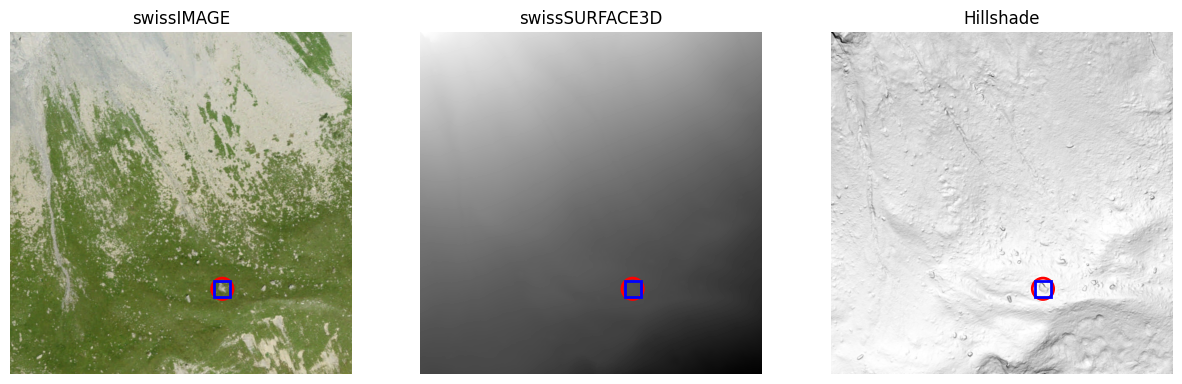

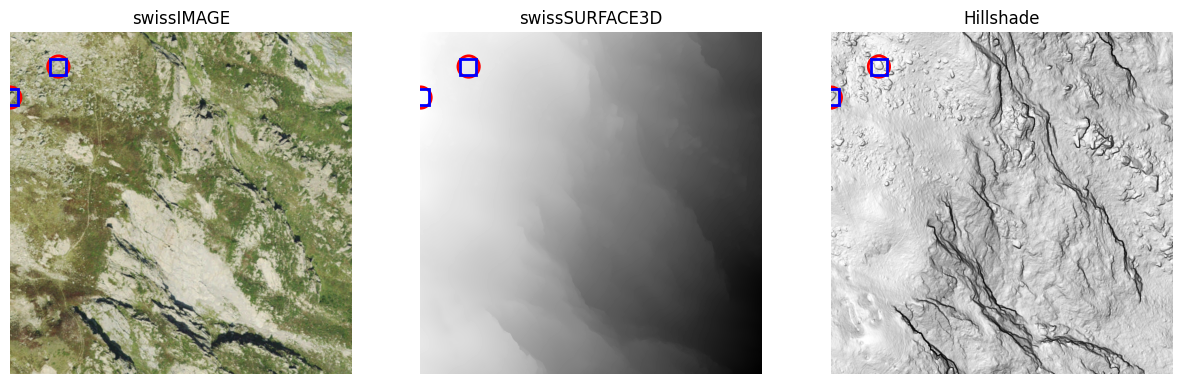

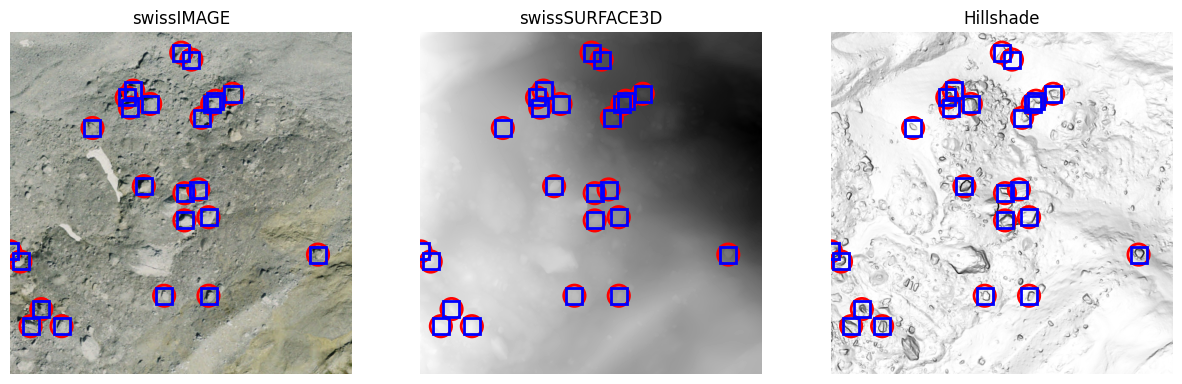

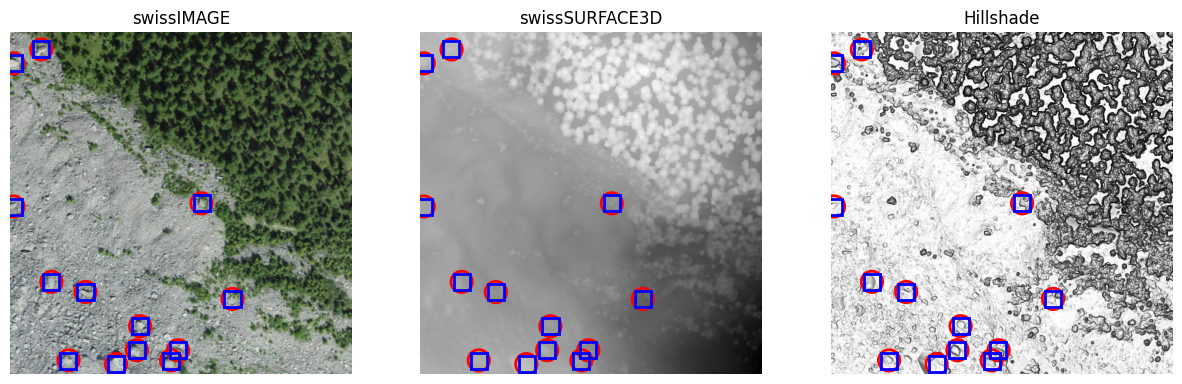

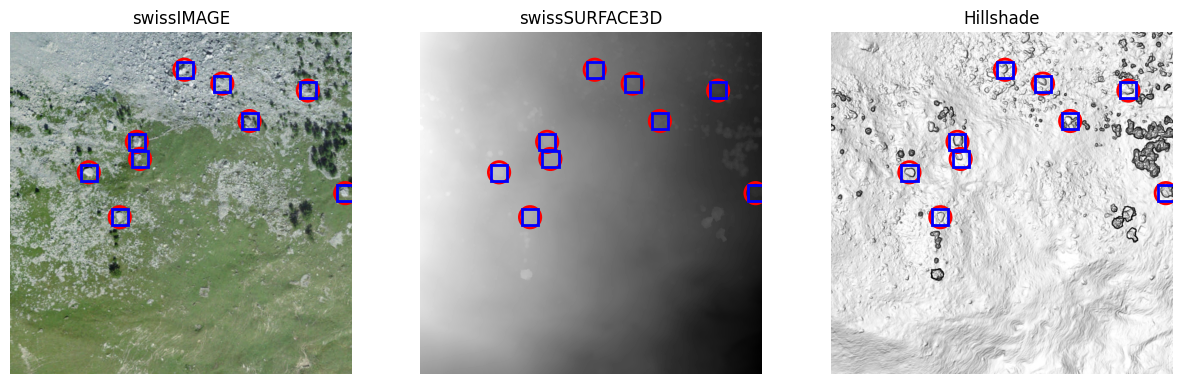

In [7]:
import random
# Paths to non-yolo format datasets:
rgb_folder = "swissImage_50cm_patches"
hillshade_folder = "swissSURFACE3D_hillshade_patches"

# Paths to the YOLO dataset
image_folder = "YOLO/images/train"
label_folder = "YOLO/labels/train"
json_file_path = 'large_rock_dataset.json'

# Load the JSON file
with open(json_file_path, 'r') as file:
    data = json.load(file)

train_data = [tile for tile in data['dataset'] if tile.get('split') == 'train' and tile.get('rocks_annotations')]

for k in range(5):  # Visualize 5 random samples
    random.shuffle(train_data)
    plot_images_with_comparison(train_data[k], label_folder="YOLO/labels/train")

Initial analysis shows that bbox size is never in the large_rock_dataset unlike what is written in Usefull_tips.ipynb, so the code defaults to our chosen size. [10,10] was too small so we pushed it up to [30,30] to have a similar radius to the one provided. As can be seen in the above images, this seems coherent. These images also permit to verify successful conversion to **YOLO** format.
<br>
This analysis also allows us to visually compare the usefulness of these different layers. We see that the swissSURFACE3D seems relatively useless, but Hillshade and rgb seem to contain a lot of usefull information.

## 3. Dataset Analysis and Augmentation

## 4. Training - Yolo

Training with all Augmentation settings set to False/Turned off and a split of split= [80,10,10].

<center>
<img src="scitas/WithoutAnyAugmentation/results.png" width="800" height="500">
</center>


Initial training using minimal augmentation, a XX-XX-XX split gives us the following results: (THIS STILL HAS TO BE UPDATED - THE TRAIN / TEST SPLIT USED FOR THIS IMAGE IS WRONG.)

<center>
<img src="scitas/train7/results.png" width="800" height="500">
</center>

This simple training was run with the following code:
```python
from ultralytics import YOLO

model = YOLO("yolov8n.pt",task='detect')
results = model.train(data="data.yml", epochs=100, batch=32, imgsz=640,overlap_mask=False,mask_ratio=0,dropout=0,flipud=0,shear = 0,degrees=0, mosaic = 0 )
```

After seeing these unsatisfactory results, we can already wonder if there is a better way to train the model

In [ ]:
plot_rgb_hillshade_combinations(rgb_folder,hillshade_folder)

Based on these images, initial tests will replace band 2 by hillshade. This seems to, at least visually, provide the least information loss from the rgb data, while displaying the hillshade data the best. The above functions normalises the hillshade values to be within [0,256], then inserts it in place of the different bands, then displays these for 5 images. This is done this way as we haven't found a functional way to incorporate 4 channels in the yolo training yet. The below image displays the comparison between the original RGB images, the RGB image with an exchanged band, and the `.tif` file displaying the RGB with the hillshade as an overlay.

In [ ]:
combined_rgb_hillshade_folder = "combined_rgb_hillshade_patches"    
plot_random_combinations_with_bboxes(rgb_folder, combined_rgb_hillshade_folder,label_folder,yolo_folder='YOLO_RGBHS/images/train')